In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import math
import random

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
# from keras.models import Sequential
# from keras.layers import Dense, SimpleRNN, LSTM

In [3]:
random.seed(42)

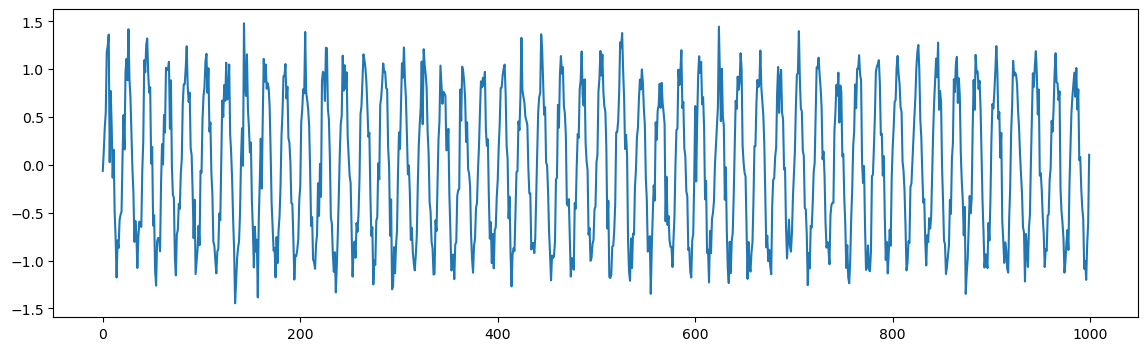

In [4]:
Fs = 100
f = 5

sample = 1000

X = np.arange(sample)
y = np.sin(2 * np.pi * f * X / Fs)

y = [i+np.random.randn()*0.2 for i in y]

plt.figure(figsize=(14, 4))
plt.plot(X, y)
plt.show()

In [5]:
df = pd.DataFrame({'y': y})

In [6]:
scalar = MinMaxScaler(feature_range=(0, 1))

dataset = scalar.fit_transform(df)

In [7]:
train_size = int(len(dataset)*0.7)
test_size = len(dataset) - train_size

In [8]:
train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

In [9]:
print(train_size), print(test_size)

700
300


(None, None)

In [10]:
len(train), len(test)

(700, 300)

In [11]:
train[100], test[100]

(array([0.46645874]), array([0.55391283]))

In [12]:
train.shape, test.shape

((700, 1), (300, 1))

In [13]:
len(train)

700

In [14]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:i+look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 20
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [15]:
X_train[0], X_train[1], X_train[2]

(array([0.47278341, 0.54336381, 0.626808  , 0.68073139, 0.89538379,
        0.91954275, 0.95966968, 0.5038825 , 0.75807465, 0.63385205,
        0.44853639, 0.54841182, 0.32699903, 0.23187784, 0.09223299,
        0.22465768, 0.19714454, 0.29655199, 0.31623032, 0.32757113]),
 array([0.54336381, 0.626808  , 0.68073139, 0.89538379, 0.91954275,
        0.95966968, 0.5038825 , 0.75807465, 0.63385205, 0.44853639,
        0.54841182, 0.32699903, 0.23187784, 0.09223299, 0.22465768,
        0.19714454, 0.29655199, 0.31623032, 0.32757113, 0.52096678]),
 array([0.626808  , 0.68073139, 0.89538379, 0.91954275, 0.95966968,
        0.5038825 , 0.75807465, 0.63385205, 0.44853639, 0.54841182,
        0.32699903, 0.23187784, 0.09223299, 0.22465768, 0.19714454,
        0.29655199, 0.31623032, 0.32757113, 0.52096678, 0.6721711 ]))

In [16]:
y_train[0], y_train[1]

(0.5209667814704326, 0.6721711006622316)

In [17]:
train[0:6]

array([[0.47278341],
       [0.54336381],
       [0.626808  ],
       [0.68073139],
       [0.89538379],
       [0.91954275]])

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((679, 20), (679,), (279, 20), (279,))

In [19]:
#1 - is used for univariate time series

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_train.shape

(679, 1, 20)

In [21]:
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_test.shape

(279, 1, 20)

In [22]:
# Create RNN network

In [23]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back), activation='tanh'))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer='adam')
model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=16)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4)                 100       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [24]:
X_train.shape

(679, 1, 20)

In [25]:
# number of samples, univariate, look_back

In [26]:
X_test.shape

(279, 1, 20)

In [27]:
temp = X_test[0].reshape(1, 1, look_back)
temp.shape

(1, 1, 20)

1/1 [==============================] - 0s 78ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==

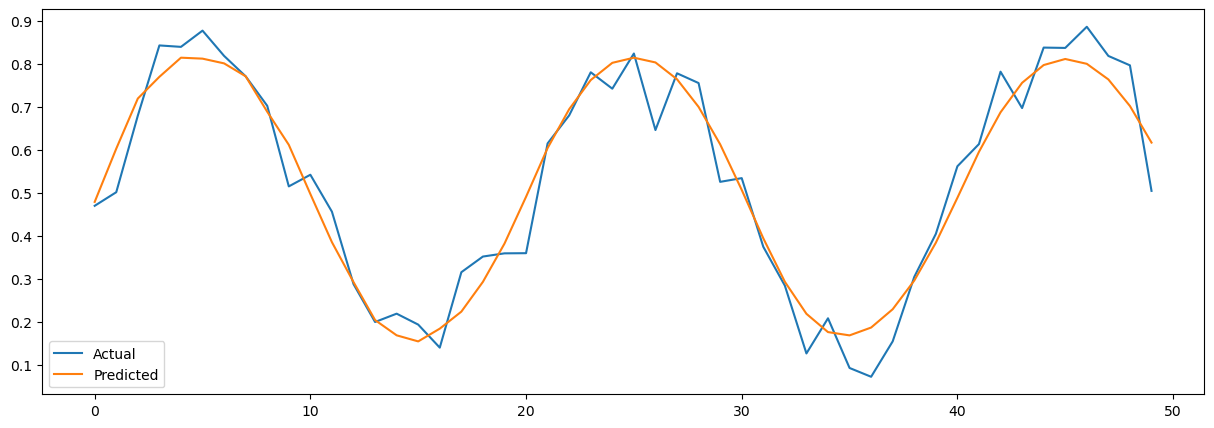

In [28]:
temp = X_test[0].reshape(1, 1, look_back)

preds = []

for i in range(50):
    pred = model.predict(temp)[0][0]    
    preds.append(pred)
    temp = list(temp[0][0])
    temp.append(pred)
    temp = np.array([[temp[1:]]])
    print(temp.shape)

plt.figure(figsize = (15, 5))
plt.plot(y_test[:len(preds)])
plt.plot(preds)
plt.legend(['Actual', 'Predicted'])

1/1 [==============================] - 0s 12ms/step
(1, 1, 20)
1/1 [==============================] - 0s 10ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [=

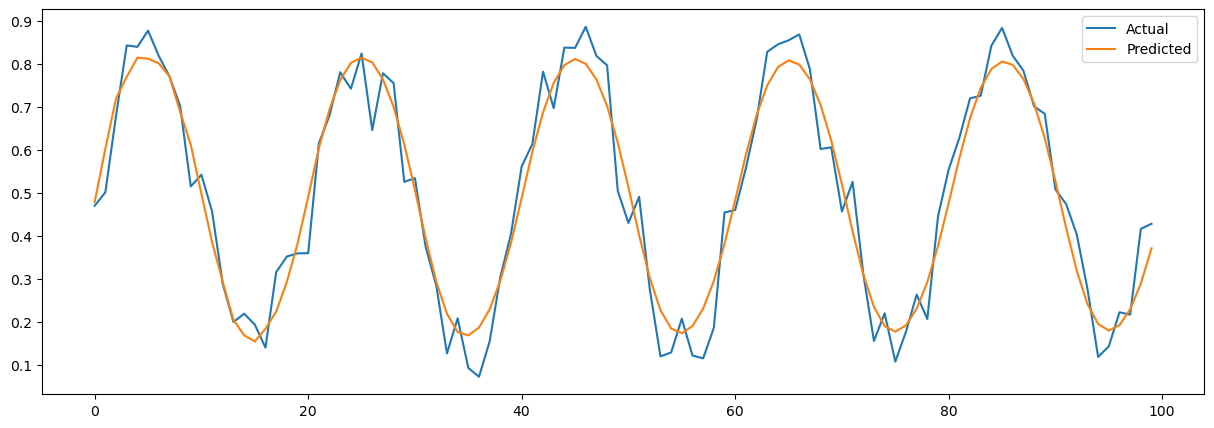

In [29]:
temp = X_test[0].reshape(1, 1, look_back)

preds = []

for i in range(100):
    pred = model.predict(temp)[0][0]    
    preds.append(pred)
    temp = list(temp[0][0])
    temp.append(pred)
    temp = np.array([[temp[1:]]])
    print(temp.shape)

plt.figure(figsize = (15, 5))
plt.plot(y_test[:len(preds)])
plt.plot(preds)
plt.legend(['Actual', 'Predicted'])

1/1 [==============================] - 0s 14ms/step
(1, 1, 20)
1/1 [==============================] - 0s 10ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 10ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [

1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [===

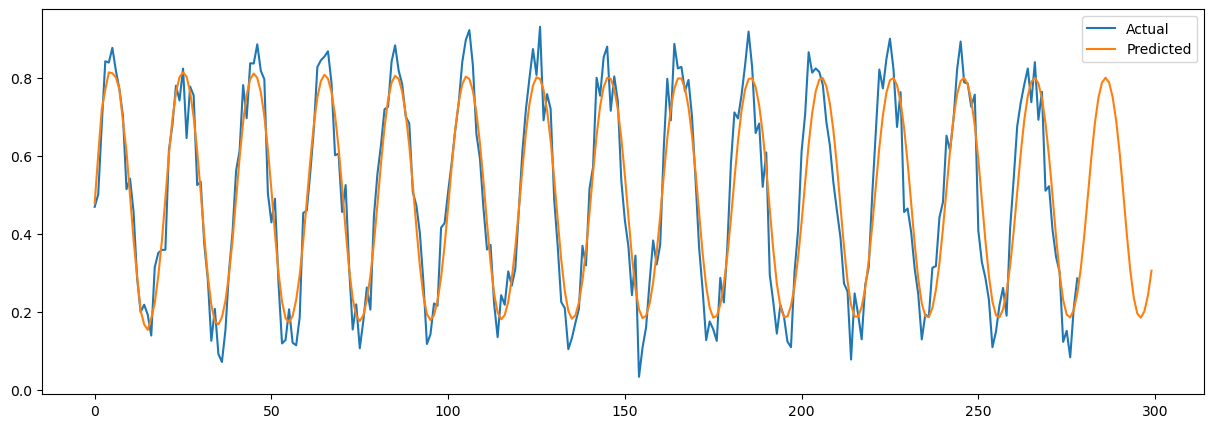

In [30]:
temp = X_test[0].reshape(1, 1, look_back)

preds = []

for i in range(300):
    pred = model.predict(temp)[0][0]    
    preds.append(pred)
    temp = list(temp[0][0])
    temp.append(pred)
    temp = np.array([[temp[1:]]])
    print(temp.shape)

plt.figure(figsize = (15, 5))
plt.plot(y_test[:len(preds)])
plt.plot(preds)
plt.legend(['Actual', 'Predicted'])

1/1 [==============================] - 0s 14ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==

1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 10ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==============================] - 0s 8ms/step
(1, 1, 20)
1/1 [==============================] - 0s 9ms/step
(1, 1, 20)
1/1 [==

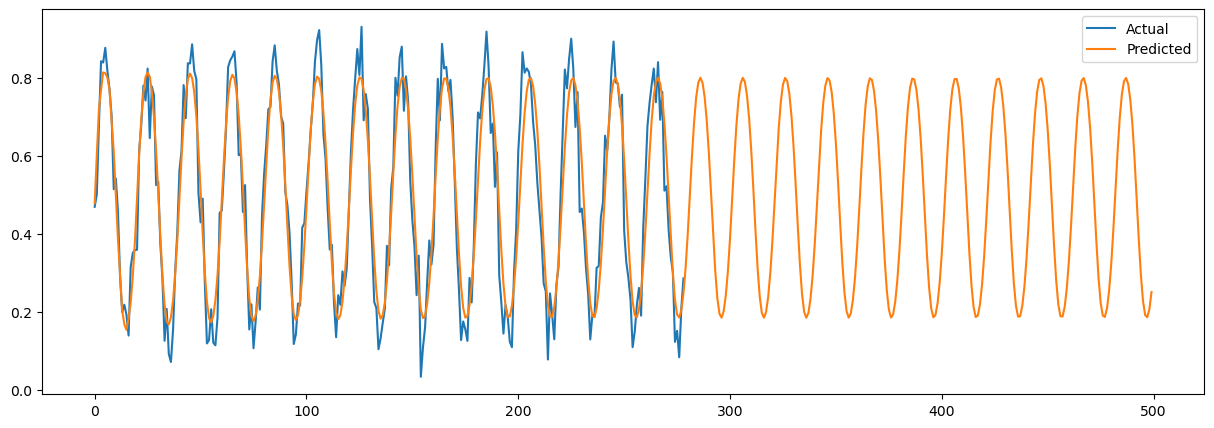

In [32]:
temp = X_test[0].reshape(1, 1, look_back)

preds = []

for i in range(500):
    pred = model.predict(temp)[0][0]    
    preds.append(pred)
    temp = list(temp[0][0])
    temp.append(pred)
    temp = np.array([[temp[1:]]])
    print(temp.shape)

plt.figure(figsize = (15, 5))
plt.plot(y_test[:len(preds)])
plt.plot(preds)
plt.legend(['Actual', 'Predicted'])